In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

from sklearn.datasets import load_wine, load_iris
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

In [ ]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'Class1', 1:'Class2', 2:'Class3'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Verginica'})

### 막대 플롯

In [24]:
wine.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0


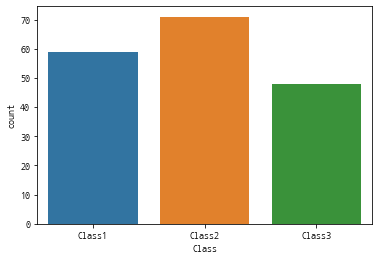

In [28]:
sns.countplot(x='Class', data=wine);

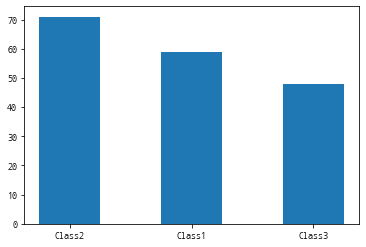

In [41]:
# 정렬 하고 싶은 경우
ser = wine['Class'].value_counts()
plt.bar(ser.index, ser.values, width=0.5, bottom=None, align='center');

### 히스토그램

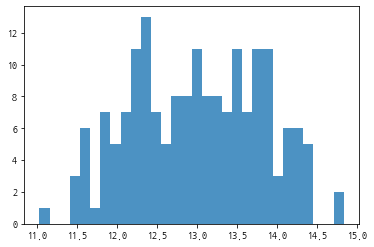

In [44]:
plt.hist(wine['alcohol'], bins=30, alpha=0.8);

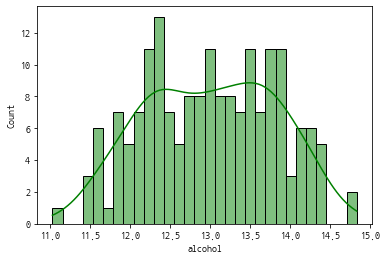

In [49]:
sns.histplot(wine['alcohol'], bins=30, alpha=0.5, color='green', kde=True);

### 라인 플롯

- https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [50]:
flights = sns.load_dataset("flights")
flights.head(1)

,year,month,passengers
0,1949,Jan,112


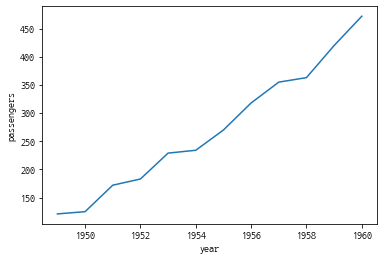

In [52]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers");

In [53]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


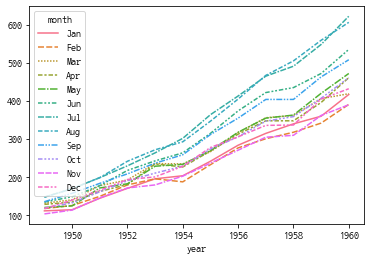

In [55]:
sns.lineplot(data=flights_wide);

In [56]:
fmri = sns.load_dataset("fmri")
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


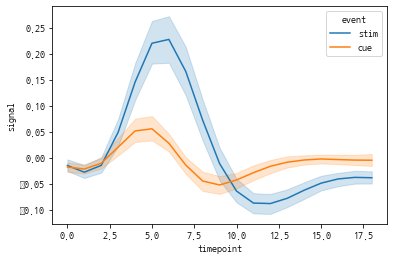

In [58]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event");

### 히트맵 

<AxesSubplot:>

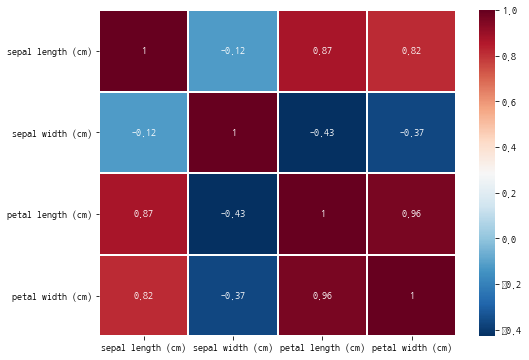

In [65]:
cor = iris.drop(columns='Class').corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor, cmap="RdBu_r", annot=True, linecolor='white', linewidths=1)

### 산점도

- https://seaborn.pydata.org/generated/seaborn.lmplot.html

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

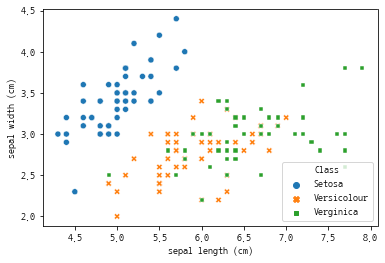

In [70]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='Class', style='Class', data=iris)

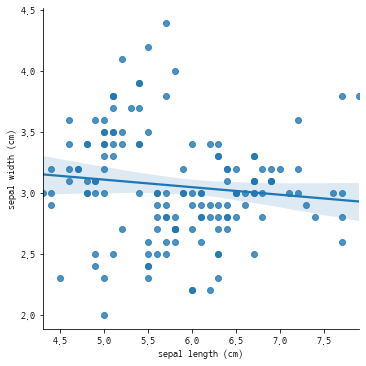

In [76]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=iris);

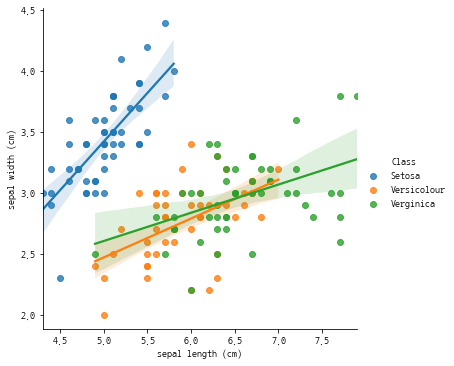

In [75]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', hue='Class', data=iris);

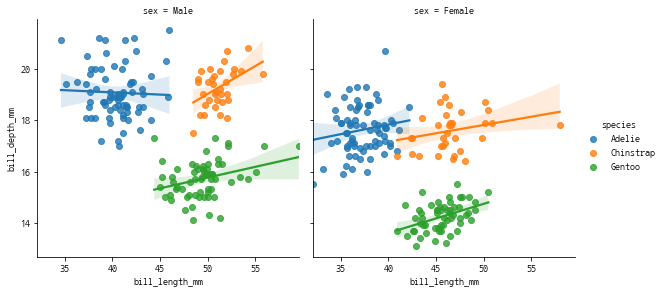

In [80]:
penguins = sns.load_dataset("penguins")
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",
           hue="species", col="sex", height=4);

잔차 플롯

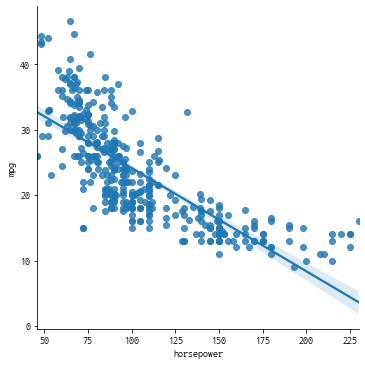

In [81]:
mpg = sns.load_dataset("mpg")

sns.lmplot(x='horsepower', y='mpg', data=mpg);

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

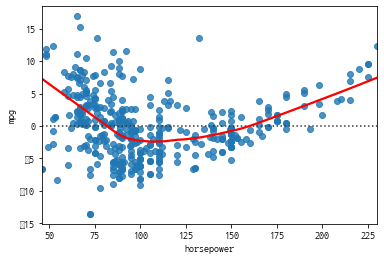

In [83]:
sns.residplot(data=mpg, x="horsepower", y="mpg", lowess=True, line_kws=dict(color="r"))  

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

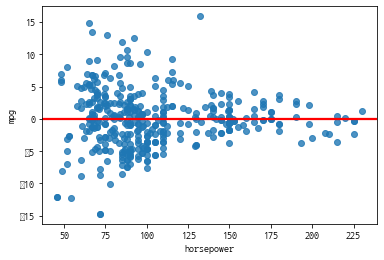

In [85]:
sns.residplot(data=mpg, x="horsepower", y="mpg", order=2, lowess=True, line_kws=dict(color="r")) # 2차항 적용 잔차플롯

### 박스 플롯

In [6]:
iris.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa


<AxesSubplot:>

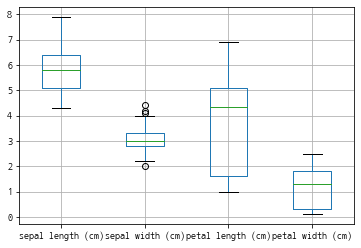

In [8]:
# 여러 컬럼
iris.drop(columns='Class').boxplot();

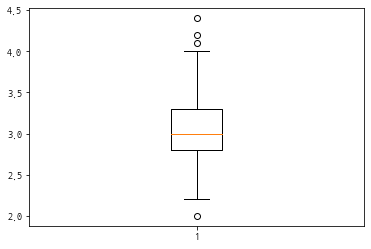

In [12]:
# 1개 컬럼 
plt.boxplot(iris['sepal width (cm)'], whis=1.5)
plt.show()

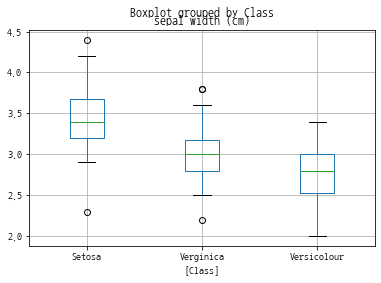

In [15]:
# 범주형 X 수치형 
iris[['sepal width (cm)', 'Class']].boxplot(by='Class');

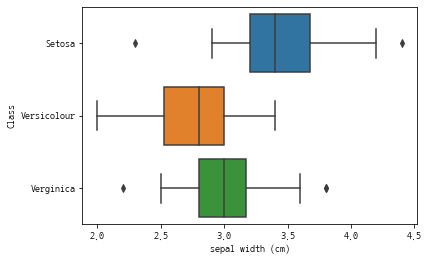

In [21]:
sns.boxplot(x='sepal width (cm)', y='Class', data=iris);

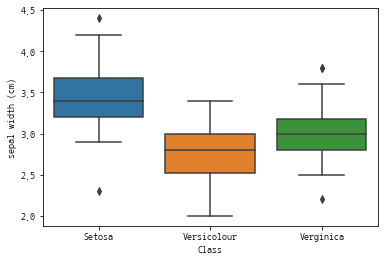

In [20]:
sns.boxplot(x='Class', y='sepal width (cm)', data=iris);

### Pairplot 

In [86]:
penguins = sns.load_dataset("penguins")
penguins.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


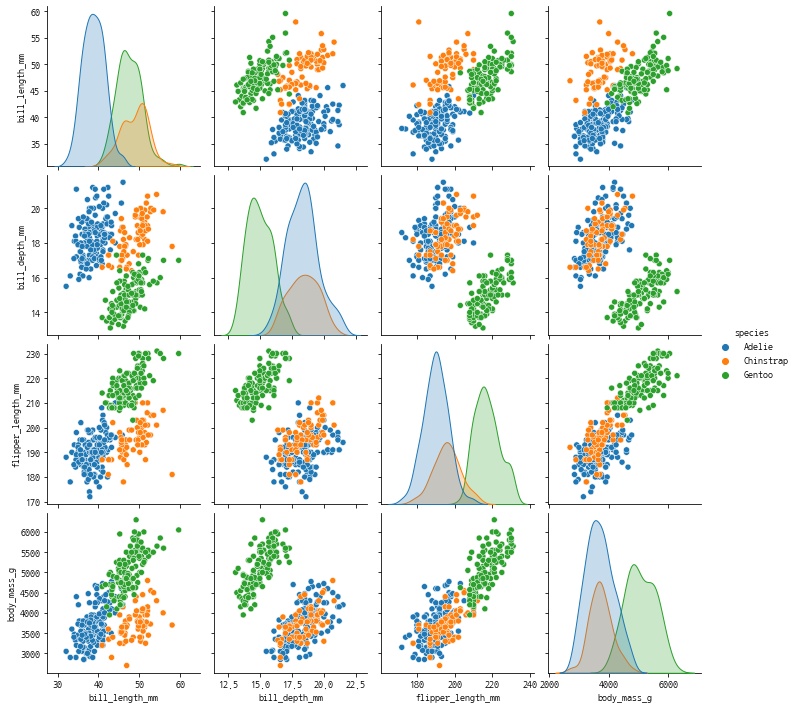

In [89]:
sns.pairplot(penguins, hue='species');

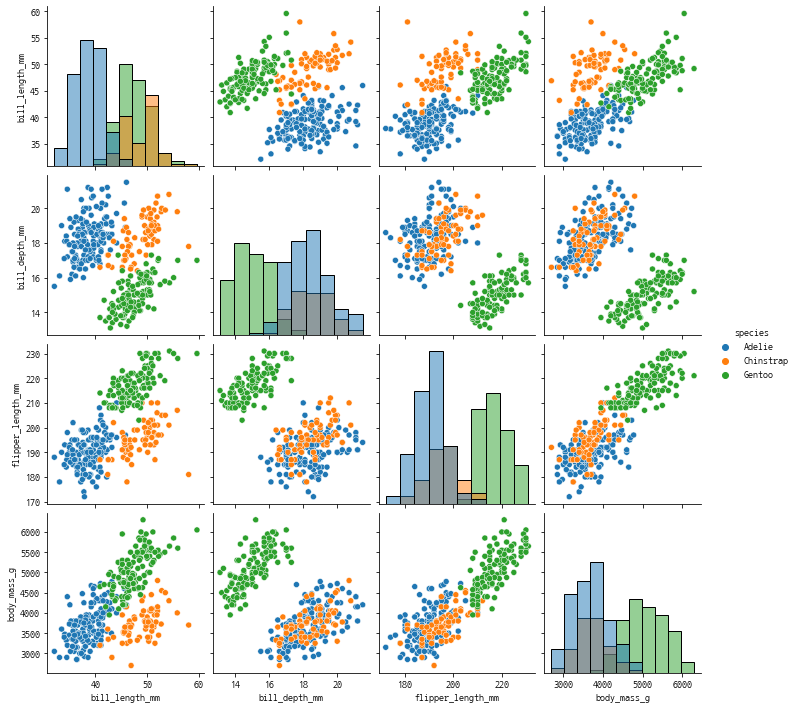

In [90]:
sns.pairplot(penguins, hue="species", diag_kind="hist")

### 클러스터맵 

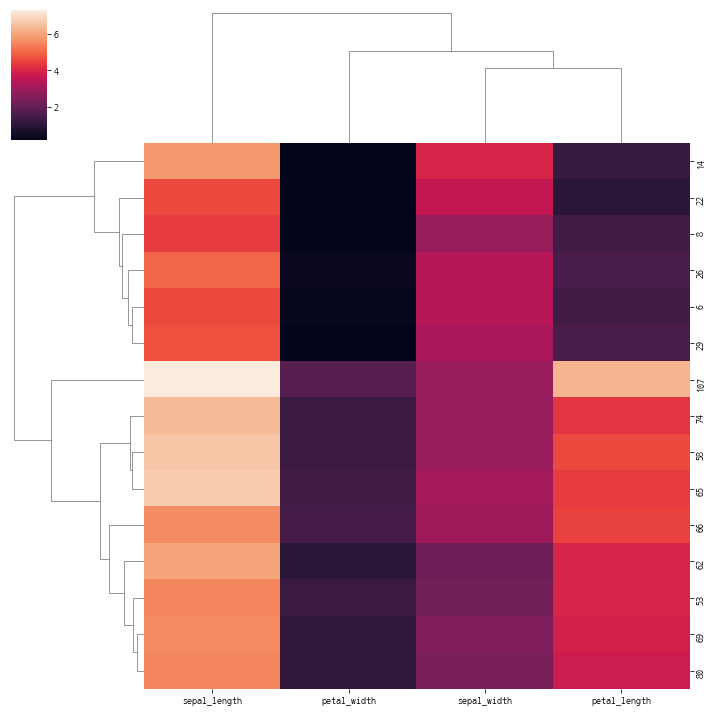

In [93]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris.sample(frac=0.1))